In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
# Read in Player data
player_df = pd.read_excel('NBA_game_data_EXPANDED.xlsx')

In [173]:
# Read in Team data
team_df = pd.read_excel('NBA_team_data.xlsx')

In [174]:
nba_teams = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BKN",
    "Charlotte Bobcats": "CHA",
    "Charlotte Hornets": "CHA",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Hornets": "NOH",
    "New Orleans/Oklahoma City Hornets": "NOK",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHX",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Seattle SuperSonics": "SEA",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Vancouver Grizzlies": "VAN",
    "Washington Bullets": "WAS",
    "Washington Wizards": "WAS"
}


In [175]:
# Drop columns from players that are not needed
player_df = player_df.drop(columns=['RANK', 'Season_type', 'MIN', 'FGM', 'FGA', 'FG3M', 'FTM', 'FTA', 'OREB', 'DREB', 'PF', 'AST_TOV', 'STL_TOV'])


In [176]:
# Drop columns from teams that are not needed
team_df = team_df.drop(columns=['Season_type'])

**Creating Stats per Game Columns**

In [177]:
# Create a points per game column
player_df['PPG'] = player_df['PTS'] / player_df['GP']

# Create an assists per game column
player_df['APG'] = player_df['AST'] / player_df['GP']

# Create a rebounds per game column
player_df['RPG'] = player_df['REB'] / player_df['GP']

# Create a steals per game column
player_df['SPG'] = player_df['STL'] / player_df['GP']

# Create a blocks per game column
player_df['BPG'] = player_df['BLK'] / player_df['GP']

# Create a turnovers per game column
player_df['TPG'] = player_df['TOV'] / player_df['GP']



**Ranking PTS, AST, REB, STL, and BLK for each year**

In [178]:
# Create a column for total Points, Assists, Rebounds, Steals, and Blocks that ranks the player in the league for that stat for that season
player_df['PTS_RANK'] = player_df.groupby(['Year'])['PTS'].rank(ascending=False)
player_df['AST_RANK'] = player_df.groupby(['Year'])['AST'].rank(ascending=False)
player_df['REB_RANK'] = player_df.groupby(['Year'])['REB'].rank(ascending=False)
player_df['STL_RANK'] = player_df.groupby(['Year'])['STL'].rank(ascending=False)
player_df['BLK_RANK'] = player_df.groupby(['Year'])['BLK'].rank(ascending=False)


**Adding in the Team's Win Percentage and Overall League Standing to Player Dataframe**

In [179]:
# Use the TEAM_ID and Year columns to create a column in player_df that shows the team's W_PCT for that season
player_df['TEAM_W_PCT'] = player_df.apply(lambda x: team_df.loc[(team_df['TEAM_ID'] == x['TEAM_ID']) & (team_df['Year'] == x['Year'])]['W_PCT'].values[0], axis=1)

# Use the TEAM_ID and Year columns to create a column in player_df that shows the team's LEAGUE_RANK for that season
player_df['TEAM_LEAGUE_RANK'] = player_df.apply(lambda x: team_df.loc[(team_df['TEAM_ID'] == x['TEAM_ID']) & (team_df['Year'] == x['Year'])]['W_PCT_RANK'].values[0], axis=1)

player_df

,Year,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,FG_PCT,FG3A,FG3_PCT,FT_PCT,...,SPG,BPG,TPG,PTS_RANK,AST_RANK,REB_RANK,STL_RANK,BLK_RANK,TEAM_W_PCT,TEAM_LEAGUE_RANK
0,1996-97,893,Michael Jordan,1610612741,CHI,82,0.486,297,0.374,0.833,...,1.707317,0.536585,2.024390,1.0,30.0,58.0,17.0,83.5,0.256,28
1,1996-97,252,Karl Malone,1610612762,UTA,82,0.550,13,0.000,0.755,...,1.378049,0.585366,2.841463,2.0,27.0,7.0,36.5,72.5,0.537,11
2,1996-97,779,Glen Rice,1610612766,CHH,79,0.477,440,0.470,0.867,...,0.911392,0.329114,2.240506,3.0,112.5,116.5,96.5,130.0,0.537,11
3,1996-97,782,Mitch Richmond,1610612758,SAC,81,0.454,477,0.428,0.861,...,1.456790,0.296296,2.925926,4.0,33.0,114.0,34.0,143.0,0.744,1
4,1996-97,84,Latrell Sprewell,1610612744,GSW,80,0.449,415,0.354,0.843,...,1.650000,0.562500,4.025000,5.0,15.0,89.0,19.0,80.5,0.256,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12823,2022-23,1631214,Alondes Williams,1610612751,BKN,1,0.000,0,0.000,0.000,...,0.000000,0.000000,2.000000,537.0,532.0,531.0,526.0,515.0,0.549,9
12824,2022-23,1629126,Deonte Burton,1610612758,SAC,2,0.000,1,0.000,0.000,...,0.000000,0.000000,0.000000,537.0,532.0,536.0,526.0,515.0,0.585,7
12825,2022-23,1628402,Frank Jackson,1610612762,UTA,1,0.000,1,0.000,0.000,...,0.000000,0.000000,0.000000,537.0,519.5,526.0,526.0,515.0,0.451,22
12826,2022-23,1630701,Michael Foster Jr.,1610612755,PHI,1,0.000,0,0.000,0.000,...,0.000000,0.000000,0.000000,537.0,532.0,536.0,526.0,515.0,0.659,3


**Analyzing the past MVP winners**

In [180]:
# Get the MVP for each season
mvp_df = player_df.loc[player_df['MVP'] == 1]
mvp_df

,Year,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,FG_PCT,FG3A,FG3_PCT,FT_PCT,...,SPG,BPG,TPG,PTS_RANK,AST_RANK,REB_RANK,STL_RANK,BLK_RANK,TEAM_W_PCT,TEAM_LEAGUE_RANK
1,1996-97,252,Karl Malone,1610612762,UTA,82,0.550,13,0.000,0.755,...,1.378049,0.585366,2.841463,2.0,27.0,7.0,36.5,72.5,0.537,11
433,1997-98,893,Michael Jordan,1610612741,CHI,82,0.465,126,0.238,0.784,...,1.719512,0.548780,2.256098,1.0,43.0,58.0,13.0,83.5,0.756,1
870,1998-99,252,Karl Malone,1610612762,UTA,49,0.493,1,0.000,0.788,...,1.265306,0.571429,3.306122,3.0,32.0,14.0,45.0,71.0,0.740,1
1305,1999-00,406,Shaquille O'Neal,1610612747,LAL,79,0.574,1,0.000,0.524,...,0.455696,3.025316,2.822785,1.0,50.5,2.0,204.0,3.0,0.817,1
1745,2000-01,947,Allen Iverson,1610612755,PHI,71,0.420,306,0.320,0.814,...,2.507042,0.281690,3.338028,2.0,39.0,145.5,2.0,174.0,0.683,2
2186,2001-02,1495,Tim Duncan,1610612759,SAS,82,0.508,10,0.100,0.799,...,0.743902,2.475610,3.207317,2.0,46.0,1.0,123.0,3.0,0.707,2
2630,2002-03,1495,Tim Duncan,1610612759,SAS,81,0.513,22,0.273,0.710,...,0.679012,2.925926,3.061728,6.0,39.5,3.0,146.5,2.0,0.732,1
3053,2003-04,708,Kevin Garnett,1610612750,MIN,82,0.499,43,0.256,0.791,...,1.463415,2.170732,2.585366,1.0,22.0,1.0,19.0,9.0,0.707,2
3546,2004-05,959,Steve Nash,1610612756,PHX,75,0.502,218,0.431,0.887,...,0.986667,0.080000,3.266667,52.0,1.0,157.5,82.0,311.5,0.756,1
3987,2005-06,959,Steve Nash,1610612756,PHX,79,0.512,342,0.439,0.921,...,0.772152,0.151899,3.493671,29.0,1.0,109.5,97.0,228.0,0.659,4


In [181]:
# Get the average PPG, APG, RPG, SPG, BPG, TPG for all MVPs
mvp_ppg = mvp_df['PPG'].mean()
mvp_apg = mvp_df['APG'].mean()
mvp_rpg = mvp_df['RPG'].mean()
mvp_spg = mvp_df['SPG'].mean()
mvp_bpg = mvp_df['BPG'].mean()
mvp_tpg = mvp_df['TPG'].mean()

# Print the rankings for each stat for each MVP
print("MVP PPG Rank: " + str(mvp_df['PTS_RANK'].mean()))
print("MVP APG Rank: " + str(mvp_df['AST_RANK'].mean()))
print("MVP RPG Rank: " + str(mvp_df['REB_RANK'].mean()))
print("MVP SPG Rank: " + str(mvp_df['STL_RANK'].mean()))
print("MVP BPG Rank: " + str(mvp_df['BLK_RANK'].mean()))





MVP PPG Rank: 5.444444444444445
MVP APG Rank: 21.48148148148148
MVP RPG Rank: 41.388888888888886
MVP SPG Rank: 46.44444444444444
MVP BPG Rank: 80.05555555555556


In [182]:
# Print the average team rank for each MVP
print("AVG MVP Team Rank: " + str(mvp_df['TEAM_LEAGUE_RANK'].mean()))

# Print the average team W_PCT for each MVP
print("AVG MVP Team W_PCT: " + str(mvp_df['TEAM_W_PCT'].mean()))


AVG MVP Team Rank: 2.7037037037037037
AVG MVP Team W_PCT: 0.7259999999999999


In [183]:
# Create a correlation matrix to see how each stat correlates to MVP voting
corr_matrix = player_df.corr(numeric_only=True)

# Print correlation between MVP and each stat
print("MVP Correlation with PPG: " + str(corr_matrix['MVP']['PPG']))
print("MVP Correlation with APG: " + str(corr_matrix['MVP']['APG']))
print("MVP Correlation with RPG: " + str(corr_matrix['MVP']['RPG']))
print("MVP Correlation with SPG: " + str(corr_matrix['MVP']['SPG']))
print("MVP Correlation with BPG: " + str(corr_matrix['MVP']['BPG']))
print("MVP Correlation with TPG: " + str(corr_matrix['MVP']['TPG']))
print("MVP Correlation with PTS_RANK: " + str(corr_matrix['MVP']['PTS_RANK']))
print("MVP Correlation with AST_RANK: " + str(corr_matrix['MVP']['AST_RANK']))
print("MVP Correlation with REB_RANK: " + str(corr_matrix['MVP']['REB_RANK']))
print("MVP Correlation with STL_RANK: " + str(corr_matrix['MVP']['STL_RANK']))
print("MVP Correlation with BLK_RANK: " + str(corr_matrix['MVP']['BLK_RANK']))
print("MVP Correlation with TEAM_W_PCT: " + str(corr_matrix['MVP']['TEAM_W_PCT']))
print("MVP Correlation with TEAM_LEAGUE_RANK: " + str(corr_matrix['MVP']['TEAM_LEAGUE_RANK']))





MVP Correlation with PPG: 0.14352560767158398
MVP Correlation with APG: 0.11557254664779529
MVP Correlation with RPG: 0.09440866331777778
MVP Correlation with SPG: 0.07724088129947296
MVP Correlation with BPG: 0.056636156984667174
MVP Correlation with TPG: 0.12261570850113242
MVP Correlation with PTS_RANK: -0.07651225708046545
MVP Correlation with AST_RANK: -0.07128702633962962
MVP Correlation with REB_RANK: -0.06479087352038454
MVP Correlation with STL_RANK: -0.06315525702468183
MVP Correlation with BLK_RANK: -0.05222515875048846
MVP Correlation with TEAM_W_PCT: 0.06989004977155024
MVP Correlation with TEAM_LEAGUE_RANK: -0.06636939245780105


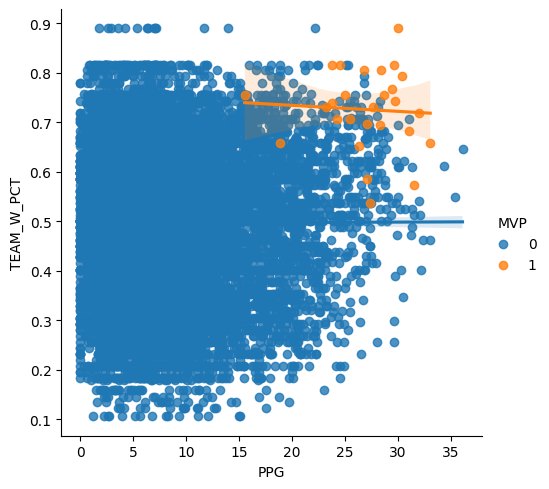

In [214]:
sns.lmplot(x = 'PPG', y = 'TEAM_W_PCT', data=player_df, hue='MVP')

**Creating Model to Predict MVP:**
***Random Forest and Gradient Boosting Model***

In [184]:
# Random Forest Model and Gradient Boosting Model to predict MVP
# import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = player_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
y = player_df['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Instantiate a random forest classifier: rf_clf
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=21)

# Fit the classifier to the training set
rf_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = rf_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Random Forest Model Accuracy: " + str(accuracy_score(y_test, y_pred)))

# Instantiate a Gradient Boosting classifier: gb_clf
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=21)

# Fit the classifier to the training set
gb_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = gb_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Gradient Boosting Model Accuracy: " + str(accuracy_score(y_test, y_pred)))




Random Forest Model Accuracy: 0.9979215380618343
Gradient Boosting Model Accuracy: 0.998181345804105


In [185]:
# Print the columns with the feature importances 
print("Random Forest Model Feature Importances:")
for feature, importance in zip(X.columns, rf_clf.feature_importances_):
    print(feature + ": " + str(importance))

print("\nGradient Boosting Model Feature Importances:")
for feature, importance in zip(X.columns, gb_clf.feature_importances_):
    print(feature + ": " + str(importance))

Random Forest Model Feature Importances:
PPG: 0.1118971151327914
APG: 0.06969655729057385
RPG: 0.08506297968311057
SPG: 0.04083804069138585
BPG: 0.05071925861225721
TPG: 0.05960332662694203
PTS_RANK: 0.137264668230245
AST_RANK: 0.0632155966680002
REB_RANK: 0.06963639621179692
STL_RANK: 0.034815132960888846
BLK_RANK: 0.05226704101780181
TEAM_W_PCT: 0.12490723754763501
TEAM_LEAGUE_RANK: 0.10007664932657132

Gradient Boosting Model Feature Importances:
PPG: 0.020807783050637466
APG: 0.046063726681403294
RPG: 0.10910533773791141
SPG: 0.0261749135652646
BPG: 0.0014203403594549488
TPG: 0.03658491624827009
PTS_RANK: 0.1719991719970372
AST_RANK: 0.10332510339479596
REB_RANK: 0.007450994270940613
STL_RANK: 0.0038204942428808454
BLK_RANK: 0.021272529757606413
TEAM_W_PCT: 0.3896287591078345
TEAM_LEAGUE_RANK: 0.06234592958596261


**Predictions using Random Forest Model**

In [186]:
# Get all unique years in the player_df
years = player_df['Year'].unique()

# Predict the MVP for each year using Random Forest Model
for year in years:
    year_df = player_df.loc[player_df['Year'] == year]

    X = year_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = rf_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER'].values[0]) + " - " + mvp_name)



1996-97: Karl Malone - Karl Malone
1997-98: Michael Jordan - Michael Jordan
1998-99: No MVP
1999-00: Shaquille O'Neal - Shaquille O'Neal
2000-01: No MVP
2001-02: Tim Duncan - Tim Duncan
2002-03: Tim Duncan - Tim Duncan
2003-04: Kevin Garnett - Kevin Garnett
2004-05: Steve Nash - Steve Nash
2005-06: Steve Nash - Steve Nash
2006-07: Dirk Nowitzki - Dirk Nowitzki
2007-08: No MVP
2008-09: LeBron James - LeBron James
2009-10: LeBron James - LeBron James
2010-11: Derrick Rose - Derrick Rose
2011-12: LeBron James - LeBron James
2012-13: LeBron James - LeBron James
2013-14: No MVP
2014-15: No MVP
2015-16: Stephen Curry - Stephen Curry
2016-17: No MVP
2017-18: James Harden - James Harden
2018-19: No MVP
2019-20: Giannis Antetokounmpo - Giannis Antetokounmpo
2020-21: Nikola Jokic - Nikola Jokic
2021-22: Nikola Jokic - Nikola Jokic
2022-23: Joel Embiid - Joel Embiid


**Predictions using Gradient Boosting Model**

In [187]:
# Predict the MVP for each year using Gradient Boosting Model
for year in years:
    year_df = player_df.loc[player_df['Year'] == year]

    X = year_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = gb_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER'].values[0]) + " - " + mvp_name)



1996-97: Karl Malone - Karl Malone
1997-98: Michael Jordan - Michael Jordan
1998-99: No MVP
1999-00: Shaquille O'Neal - Shaquille O'Neal
2000-01: No MVP
2001-02: Tim Duncan - Tim Duncan
2002-03: Tim Duncan - Tim Duncan
2003-04: Kevin Garnett - Kevin Garnett
2004-05: Steve Nash - Steve Nash
2005-06: Steve Nash - Steve Nash
2006-07: Dirk Nowitzki - Dirk Nowitzki
2007-08: No MVP
2008-09: LeBron James - LeBron James
2009-10: LeBron James - LeBron James
2010-11: Derrick Rose - Derrick Rose
2011-12: LeBron James - LeBron James
2012-13: LeBron James - Kevin Durant
2013-14: No MVP
2014-15: Stephen Curry - Stephen Curry
2015-16: Stephen Curry - Stephen Curry
2016-17: Russell Westbrook - Russell Westbrook
2017-18: James Harden - James Harden
2018-19: No MVP
2019-20: Giannis Antetokounmpo - Giannis Antetokounmpo
2020-21: Nikola Jokic - Nikola Jokic
2021-22: Nikola Jokic - Nikola Jokic
2022-23: Joel Embiid - Joel Embiid


**Using GroupShuffleSplit to Split data**

In [188]:
# Predict the MVP for each year using GroupShuffleSplit
from sklearn.model_selection import GroupShuffleSplit

# Create a GroupShuffleSplit object
gss = GroupShuffleSplit(n_splits=10, test_size=0.3, random_state=21)

# Split the data into training and testing sets using the GroupShuffleSplit object
X = player_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
y = player_df['MVP']

train_idx, test_idx = next(gss.split(X, y, groups=player_df['Year']))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Instantiate a random forest classifier: rf_clf
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=21)

# Fit the classifier to the training set
rf_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = rf_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Random Forest Model Accuracy: " + str(accuracy_score(y_test, y_pred)))

# Instantiate a Gradient Boosting classifier: gb_clf
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=21)

# Fit the classifier to the training set
gb_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = gb_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Gradient Boosting Model Accuracy: " + str(accuracy_score(y_test, y_pred)))





Random Forest Model Accuracy: 0.9984105358764759
Gradient Boosting Model Accuracy: 0.9981834695731153


In [189]:
# Print the columns with the feature importances 
print("Random Forest Model after Group Shuffle Split Feature Importances:")
for feature, importance in zip(X.columns, rf_clf.feature_importances_):
    print(feature + ": " + str(importance))

print("\nGradient Boosting Model after Group Shuffle Split Feature Importances:")
for feature, importance in zip(X.columns, gb_clf.feature_importances_):
    print(feature + ": " + str(importance))

Random Forest Model after Group Shuffle Split Feature Importances:
PPG: 0.11629264812116408
APG: 0.0655482289940539
RPG: 0.06246525296044298
SPG: 0.04824613367403806
BPG: 0.04618309029026382
TPG: 0.08012901941166294
PTS_RANK: 0.1244815519188157
AST_RANK: 0.055875332755248135
REB_RANK: 0.05882380100602956
STL_RANK: 0.03610840816623659
BLK_RANK: 0.041633724454017015
TEAM_W_PCT: 0.14497751388634392
TEAM_LEAGUE_RANK: 0.11923529436168329

Gradient Boosting Model after Group Shuffle Split Feature Importances:
PPG: 0.15670280479012189
APG: 0.1140279881307362
RPG: 0.20789501998071414
SPG: 0.002440737157118358
BPG: 0.0029465599695146475
TPG: 0.0023348112144751716
PTS_RANK: 0.13369790209752938
AST_RANK: 0.12063147764201246
REB_RANK: 0.001626737068022571
STL_RANK: 0.00010871927449643757
BLK_RANK: 0.0
TEAM_W_PCT: 0.13042814056503754
TEAM_LEAGUE_RANK: 0.12715910211022136


In [190]:
# Predict the MVP for each year using Random Forest Model after Group Shuffle Split
for year in years:
    year_df = player_df.loc[player_df['Year'] == year]

    X = year_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = rf_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER'].values[0]) + " - " + mvp_name)

1996-97: Karl Malone - Karl Malone
1997-98: Michael Jordan - Karl Malone
1998-99: Karl Malone - Karl Malone
1999-00: Shaquille O'Neal - Shaquille O'Neal
2000-01: Allen Iverson - Allen Iverson
2001-02: No MVP
2002-03: Tim Duncan - Tim Duncan
2003-04: No MVP
2004-05: Steve Nash - Steve Nash
2005-06: Steve Nash - Steve Nash
2006-07: Dirk Nowitzki - Dirk Nowitzki
2007-08: No MVP
2008-09: LeBron James - LeBron James
2009-10: LeBron James - LeBron James
2010-11: Derrick Rose - Derrick Rose
2011-12: LeBron James - LeBron James
2012-13: LeBron James - LeBron James
2013-14: Kevin Durant - Kevin Durant
2014-15: Stephen Curry - Stephen Curry
2015-16: Stephen Curry - Stephen Curry
2016-17: No MVP
2017-18: James Harden - James Harden
2018-19: Giannis Antetokounmpo - Giannis Antetokounmpo
2019-20: Giannis Antetokounmpo - Giannis Antetokounmpo
2020-21: Nikola Jokic - Nikola Jokic
2021-22: No MVP
2022-23: Joel Embiid - Joel Embiid


In [191]:
# Predict the MVP for each year using Gradient Boosting Model after Group Shuffle Split
for year in years:
    year_df = player_df.loc[player_df['Year'] == year]

    X = year_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = gb_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER'].values[0]) + " - " + mvp_name)

1996-97: Karl Malone - Karl Malone
1997-98: Michael Jordan - Karl Malone
1998-99: Karl Malone - Karl Malone
1999-00: No MVP
2000-01: Allen Iverson - Allen Iverson
2001-02: No MVP
2002-03: Tim Duncan - Tim Duncan
2003-04: No MVP
2004-05: Steve Nash - Steve Nash
2005-06: Steve Nash - Steve Nash
2006-07: Dirk Nowitzki - Dirk Nowitzki
2007-08: No MVP
2008-09: LeBron James - LeBron James
2009-10: LeBron James - LeBron James
2010-11: Derrick Rose - Derrick Rose
2011-12: LeBron James - LeBron James
2012-13: LeBron James - LeBron James
2013-14: Kevin Durant - Kevin Durant
2014-15: Stephen Curry - Stephen Curry
2015-16: Stephen Curry - Stephen Curry
2016-17: Russell Westbrook - Russell Westbrook
2017-18: James Harden - James Harden
2018-19: Giannis Antetokounmpo - Giannis Antetokounmpo
2019-20: Giannis Antetokounmpo - Giannis Antetokounmpo
2020-21: Nikola Jokic - Nikola Jokic
2021-22: Nikola Jokic - Joel Embiid
2022-23: Joel Embiid - Joel Embiid
